# <1> Import library, API

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from collections import Counter

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# <2> Load dataset and create training, validation and test set



In [ ]:
dataset = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check for imbalance in dataset
negative, positive = np.bincount(dataset['Class'])
total = negative + positive
print('Total: {}\nPositive: {} ({:.3f}% of total)'.format(total, positive, positive / total * 100))

Total: 284807
Positive: 492 (0.173% of total)


In [ ]:
# Describe some columns
dataset[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Extract dataset into X and y
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

# Scaling column 'Amount' to reduce its range
X['Amount'] = np.log(X['Amount'] + 0.001)

# Split dataset into train, validtion and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
# X_val = X_val.to_numpy()
# y_val = y_val.to_numpy()

In [ ]:
print("Train set's features: ", X_train.shape)
print("Train set's label: ", y_train.shape)
print("Data distribution: ", Counter(y_train))
# print("Validation set's features: ", X_val.shape)
# print("Validation set's label: ", y_val.shape)
print("Test set's features: ", X_test.shape)
print("Test set's label: ", y_test.shape)
print("Data distribution: ", Counter(y_test))

Train set's features:  (227845, 29)
Train set's label:  (227845,)
Data distribution:  Counter({0: 227451, 1: 394})
Test set's features:  (56962, 29)
Test set's label:  (56962,)
Data distribution:  Counter({0: 56864, 1: 98})


# <3> Define the model, choose the metrics, initialize weights

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa
from keras import backend as K

In [ ]:
def focal_loss_custom(alpha, gamma):
    def binary_focal_loss(y_true, y_pred):
        fl = tfa.losses.SigmoidFocalCrossEntropy(alpha=alpha, gamma=gamma)
        y_true_K = K.ones_like(y_true)
        focal_loss = fl(y_true, y_pred)
        return focal_loss
    return binary_focal_loss

In [ ]:
# Choose epochs and batch_size, define early_stopping function
EPOCHS = 100
BATCH_SIZE = 64

early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_prc', 
    verbose = 1,
    patience = 20,
    mode = 'max',
    restore_best_weights = True)

In [ ]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    # keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    # keras.metrics.AUC(name='roc'),
    keras.metrics.AUC(name='prc', curve='PR')
]

def build_model(metrics = METRICS):
    model = keras.models.Sequential([
        keras.layers.Dense(units = 16, activation = 'relu', input_shape = (X_train.shape[-1],)),
        keras.layers.Dropout(rate = 0.2),
        keras.layers.Dense(units = 1, activation = 'sigmoid')
    ])

    model.compile(
        optimizer = keras.optimizers.Adam(learning_rate=1e-3),
        loss = focal_loss_custom(alpha = 0.2, gamma = 2.0),
        # loss = keras.losses.BinaryCrossentropy(),
        metrics = metrics
    )

    return model

In [ ]:
import tempfile
import os

In [ ]:
# Checkpoint the initial weights
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')

#<4> Visualization functions

In [ ]:
def plot_metrics(history, location):
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[n+1], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric], color=colors[n+1], linestyle="--", label='Test')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        # if metric == 'loss':
        #     plt.ylim([0, plt.ylim()[1]])
        # elif metric == 'auc':
        #     plt.ylim([2,1])
        # else:
        #     plt.ylim([0,1])

        plt.legend();
    plt.savefig(location)

In [ ]:
def plot_cm(labels, predictions, location, p = 0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig(location)

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [ ]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, thresholds = precision_recall_curve(labels, predictions)
    f2_score = (5 * precision * recall) / (4 * precision + recall)
    idx = np.argmax(f2_score)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

    return thresholds[idx]

# <5> Training Model

In [ ]:
model = build_model()
model.save_weights(initial_weights)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                480       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train,
    y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data = (X_test, y_test))

Epoch 1/100
3561/3561 [==============================] - 19s 5ms/step - loss: 0.0049 - tp: 152.0000 - fp: 1491.0000 - tn: 225960.0000 - fn: 242.0000 - precision: 0.0925 - recall: 0.3858 - prc: 0.2220 - val_loss: 5.1349e-04 - val_tp: 57.0000 - val_fp: 8.0000 - val_tn: 56856.0000 - val_fn: 41.0000 - val_precision: 0.8769 - val_recall: 0.5816 - val_prc: 0.6832
Epoch 2/100
3561/3561 [==============================] - 22s 6ms/step - loss: 5.4769e-04 - tp: 157.0000 - fp: 26.0000 - tn: 227425.0000 - fn: 237.0000 - precision: 0.8579 - recall: 0.3985 - prc: 0.6424 - val_loss: 4.1462e-04 - val_tp: 47.0000 - val_fp: 1.0000 - val_tn: 56863.0000 - val_fn: 51.0000 - val_precision: 0.9792 - val_recall: 0.4796 - val_prc: 0.7829
Epoch 3/100
3561/3561 [==============================] - 11s 3ms/step - loss: 3.7578e-04 - tp: 168.0000 - fp: 15.0000 - tn: 227436.0000 - fn: 226.0000 - precision: 0.9180 - recall: 0.4264 - prc: 0.7455 - val_loss: 4.0240e-04 - val_tp: 63.0000 - val_fp: 5.0000 - val_tn: 56859.00

In [ ]:
model.save('model.h5')

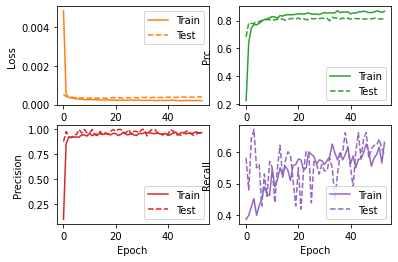

In [ ]:
plot_metrics(baseline_history, 'metrics')

In [ ]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

loss :  0.00034646803396753967
tp :  54.0
fp :  1.0
tn :  56863.0
fn :  44.0
precision :  0.9818181991577148
recall :  0.5510203838348389
prc :  0.822812557220459

Legitimate Transactions Detected (True Negatives):  56863
Legitimate Transactions Incorrectly Detected (False Positives):  1
Fraudulent Transactions Missed (False Negatives):  44
Fraudulent Transactions Detected (True Positives):  54
Total Fraudulent Transactions:  98


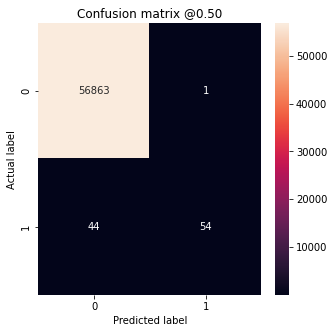

In [ ]:
baseline_results = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)

print()
plot_cm(y_test, test_predictions_baseline, 'confusion_matrix')

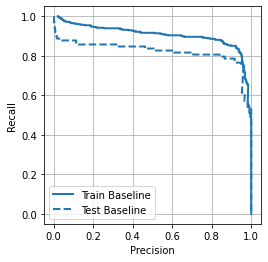

In [ ]:
threshold = plot_prc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower left');
plt.savefig('auprc')

Legitimate Transactions Detected (True Negatives):  56848
Legitimate Transactions Incorrectly Detected (False Positives):  16
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  79
Total Fraudulent Transactions:  98


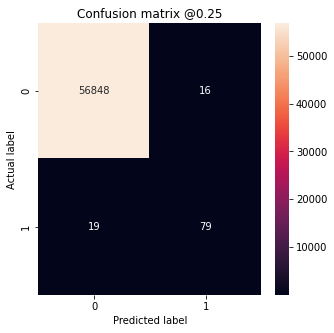

In [ ]:
plot_cm(y_test, test_predictions_baseline, 'confusion_matrix_threshold', p = threshold)

# <6> Sampling moethod: SMOTE

In [ ]:
!pip install imbalanced-learn
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train_SMOTE, y_train_SMOTE = pipeline.fit_resample(X_train, y_train)
print("After applying SMOTE:")
print("Train set's features: ", X_train_SMOTE.shape)
print("Train set's label: ", y_train_SMOTE.shape)
print("Data distribution: ", Counter(y_train_SMOTE))

After applying SMOTE:
Train set's features:  (68235, 29)
Train set's label:  (68235,)
Data distribution:  Counter({0: 45490, 1: 22745})


In [ ]:
model.load_weights(initial_weights)
baseline_SMOTE_history = model.fit(
    X_train_SMOTE,
    y_train_SMOTE,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data = (X_test, y_test))

Epoch 1/100
1067/1067 [==============================] - 5s 4ms/step - loss: 0.0133 - tp: 19764.0000 - fp: 417.0000 - tn: 45073.0000 - fn: 2981.0000 - precision: 0.9793 - recall: 0.8689 - prc: 0.9786 - val_loss: 0.0035 - val_tp: 81.0000 - val_fp: 102.0000 - val_tn: 56762.0000 - val_fn: 17.0000 - val_precision: 0.4426 - val_recall: 0.8265 - val_prc: 0.7504
Epoch 2/100
1067/1067 [==============================] - 4s 4ms/step - loss: 0.0075 - tp: 20200.0000 - fp: 159.0000 - tn: 45331.0000 - fn: 2545.0000 - precision: 0.9922 - recall: 0.8881 - prc: 0.9927 - val_loss: 0.0027 - val_tp: 82.0000 - val_fp: 83.0000 - val_tn: 56781.0000 - val_fn: 16.0000 - val_precision: 0.4970 - val_recall: 0.8367 - val_prc: 0.7776
Epoch 3/100
1067/1067 [==============================] - 4s 4ms/step - loss: 0.0063 - tp: 20514.0000 - fp: 158.0000 - tn: 45332.0000 - fn: 2231.0000 - precision: 0.9924 - recall: 0.9019 - prc: 0.9950 - val_loss: 0.0024 - val_tp: 82.0000 - val_fp: 96.0000 - val_tn: 56768.0000 - val_fn:

In [ ]:
model.save('model_SMOTE.h5')

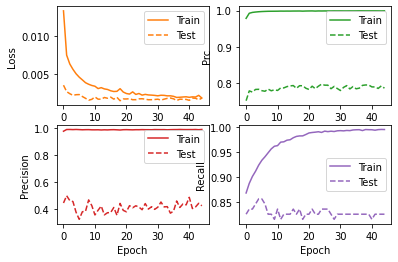

In [ ]:
plot_metrics(baseline_SMOTE_history, 'metrics_SMOTE')

In [ ]:
train_predictions_baselineSMOTE = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baselineSMOTE = model.predict(X_test, batch_size=BATCH_SIZE)

loss :  0.0017435086192563176
tp :  82.0
fp :  117.0
tn :  56747.0
fn :  16.0
precision :  0.41206029057502747
recall :  0.8367347121238708
prc :  0.7962650060653687

Legitimate Transactions Detected (True Negatives):  56747
Legitimate Transactions Incorrectly Detected (False Positives):  117
Fraudulent Transactions Missed (False Negatives):  16
Fraudulent Transactions Detected (True Positives):  82
Total Fraudulent Transactions:  98


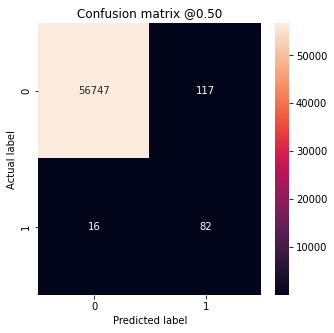

In [ ]:
baselineSMOTE_results = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baselineSMOTE_results):
    print(name, ': ', value)

print()
plot_cm(y_test, test_predictions_baselineSMOTE, 'confusion_matrix_SMOTE')

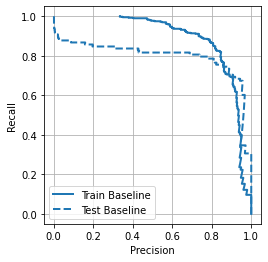

In [ ]:
thresholdSMOTE = plot_prc("Train Baseline", y_train, train_predictions_baselineSMOTE, color=colors[0])
plot_prc("Test Baseline", y_test, test_predictions_baselineSMOTE, color=colors[0], linestyle='--')
plt.legend(loc='lower left');
plt.savefig('auprc_SMOTE')

Legitimate Transactions Detected (True Negatives):  56821
Legitimate Transactions Incorrectly Detected (False Positives):  43
Fraudulent Transactions Missed (False Negatives):  18
Fraudulent Transactions Detected (True Positives):  80
Total Fraudulent Transactions:  98


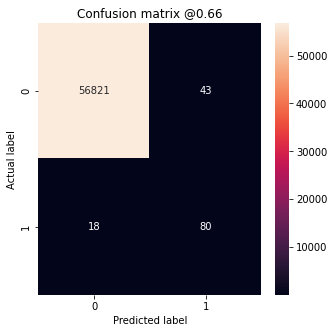

In [ ]:
plot_cm(y_test, test_predictions_baselineSMOTE, 'confusion_matrix_SMOTE_threshold', p = thresholdSMOTE)